In [20]:
from random import randint

import networkx as nx
import pandas as pd
import torch
from matplotlib import pyplot as plt
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as nng
import numpy as np

import random

from Dimploma.EnvironmentTree import EnvMinimalTreeTwoStep
from Dimploma.util import show_data, generate_random_full_graph, show_graph
import Dimploma.util as util
from Dimploma.utils.graph_provider import GraphProvider


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
node_amount = 10
edge_amount = int(torch.sum(torch.arange(node_amount)).item()*0.75)
edge_value_min = 1
edge_value_max = 10

In [4]:
int(torch.sum(torch.arange(node_amount)).item()*0.75)

33

In [ ]:


x = torch.arange(node_amount)
parent = torch.arange(node_amount)
edge_index = torch.zeros((edge_amount, 2))
edges_attr = torch.zeros((edge_amount, 2))
edges_weight = torch.zeros(edge_amount)
e = 0

# make a basic tree
while not torch.all(parent == parent[0]):
    mask = parent == parent[0]

    from_nodes = x[mask]
    to_nodes = x[~mask]
    
    random_from = from_nodes[random.randint(0, from_nodes.shape[0] - 1)]
    random_to = to_nodes[random.randint(0, to_nodes.shape[0] - 1)]
    
    edge_index[e] = torch.tensor([random_from, random_to])
    edges_weight[e] = randint(edge_value_min, edge_value_max)
    edges_attr[e, 0] = edges_weight[e]
    edges_attr[e, 1] = 0
    e += 1
    parent[random_to] = parent[random_from]

# fill out the rest with random picks
while e < edge_amount:
    
    node_from = random.randint(0, node_amount - 1)
    
    possibilities = torch.arange(node_amount)
    
    # filter out self loops
    possibilities = possibilities[possibilities != node_from]
    
    # filter out already existing edges
    banned_nodes1 = edge_index[edge_index[:, 0] == node_from, 1]
    banned_nodes2 = edge_index[edge_index[:, 1] == node_from, 0] 
    mask = torch.logical_not(torch.any(possibilities.unsqueeze(1) == torch.unique(torch.cat((banned_nodes1, banned_nodes2))), dim=1))
    
    possibilities = possibilities[mask]
    
    if possibilities.shape[0] > 0:
        # pick one and create edge
        node_to = random.randint(0, possibilities.shape[0] - 1)
        edge_index[e] = torch.tensor([node_from, possibilities[node_to]])
        edges_weight[e] = randint(edge_value_min, edge_value_max)
        edges_attr[e, 0] = edges_weight[e]
        edges_attr[e, 1] = 0
        
        e += 1

graph = Data(x=x, edge_index=edge_index.T, edge_attr=edges_attr, edge_weight=edges_weight)
show_data(graph)

In [ ]:
# show_data(generate_random_graph_2(node_amount, edge_amount, edge_value_min, edge_value_max))

In [ ]:
graph_test = generate_random_full_graph(10)
graph_test, graph_test.x, graph_test.edge_index, graph_test.edge_attr, graph_test.edge_weight

In [38]:
x = torch.zeros((node_amount, 2))
edges = torch.zeros((2, edge_amount), dtype=torch.int64)
edges_attr = torch.zeros((edge_amount, 3), dtype=torch.float32)
edges_weight = torch.zeros(edge_amount, dtype=torch.float32)

for i in range(node_amount):
    x[i, 0] = i
edges[0, 0] = 5
edges[1, 0] = 0
edges_weight[0] = 10
edges[0, 1] = 5
edges[1, 1] = 1
edges_weight[1] = 10
edges[0, 2] = 5
edges[1, 2] = 2
edges_weight[2] = 10
edges[0, 3] = 5
edges[1, 3] = 3
edges_weight[3] = 2
edges[0, 4] = 5
edges[1, 4] = 4
edges_weight[4] = 10
edges[0, 5] = 5
edges[1, 5] = 6
edges_weight[5] = 1
edges[0, 6] = 5
edges[1, 6] = 7
edges_weight[6] = 10
edges[0, 7] = 5
edges[1, 7] = 8
edges_weight[7] = 10
edges[0, 8] = 5
edges[1, 8] = 9
edges_weight[8] = 10
edges[0, 9] = 0
edges[1, 9] = 1
edges_weight[9] = 2
edges[0, 10] = 1
edges[1, 10] = 2
edges_weight[10] = 5
edges[0, 11] = 2
edges[1, 11] = 3
edges_weight[11] = 2
edges[0, 12] = 3
edges[1, 12] = 4
edges_weight[12] = 2
edges[0, 13] = 4
edges[1, 13] = 6
edges_weight[13] = 4
edges[0, 14] = 6
edges[1, 14] = 7
edges_weight[14] = 2
edges[0, 15] = 7
edges[1, 15] = 8
edges_weight[15] = 1
edges[0, 16] = 8
edges[1, 16] = 9
edges_weight[16] = 1
edges[0, 17] = 9
edges[1, 17] = 0
edges_weight[17] = 2
edges[0, 18] = 1
edges[1, 18] = 8
edges_weight[18] = 1
edges[0, 19] = 2
edges[1, 19] = 8
edges_weight[19] = 1
edges[0, 20] = 3
edges[1, 20] = 8
edges_weight[20] = 1
edges[0, 21] = 4
edges[1, 21] = 7
edges_weight[21] = 7
edges[0, 22] = 6
edges[1, 22] = 8
edges_weight[22] = 1
edges[0, 23] = 7
edges[1, 23] = 9
edges_weight[23] = 3
edges[0, 24] = 8
edges[1, 24] = 0
edges_weight[24] = 1
edges[0, 25] = 9
edges[1, 25] = 1
edges_weight[25] = 8
edges[0, 26] = 0
edges[1, 26] = 2
edges_weight[26] = 2
edges[0, 27] = 0
edges[1, 27] = 3
edges_weight[27] = 2
edges[0, 28] = 1
edges[1, 28] = 4
edges_weight[28] = 7
edges[0, 29] = 2
edges[1, 29] = 6
edges_weight[29] = 8
edges[0, 30] = 3
edges[1, 30] = 7
edges_weight[30] = 2
edges[0, 31] = 4
edges[1, 31] = 8
edges_weight[31] = 1
edges[0, 32] = 6
edges[1, 32] = 9
edges_weight[32] = 2

edges_attr[:, 2] = edges_weight[:]

max_distance = torch.max(edges_attr[:, 2])
edges_attr[:, 0] = edges_attr[:, 2] / max_distance

res_graph_bad = Data(x=x, edge_index=edges, edge_attr=edges_attr, edge_weight=edges_weight)
torch.save(res_graph_bad, f'../graphs/graph12_n{node_amount}_e{edge_amount}_custom_bad2.pt')

res_graph_bad, res_graph_bad.x, res_graph_bad.edge_index, res_graph_bad.edge_attr, res_graph_bad.edge_weight

(Data(x=[10, 2], edge_index=[2, 33], edge_attr=[33, 3], edge_weight=[33]),
 tensor([[0., 0.],
         [1., 0.],
         [2., 0.],
         [3., 0.],
         [4., 0.],
         [5., 0.],
         [6., 0.],
         [7., 0.],
         [8., 0.],
         [9., 0.]]),
 tensor([[5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 1, 2, 3, 4, 6, 7, 8, 9, 1, 2, 3, 4, 6, 7,
          8, 9, 0, 0, 1, 2, 3, 4, 6],
         [0, 1, 2, 3, 4, 6, 7, 8, 9, 1, 2, 3, 4, 6, 7, 8, 9, 0, 8, 8, 8, 7, 8, 9,
          0, 1, 2, 3, 4, 6, 7, 8, 9]]),
 tensor([[ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 0.2000,  0.0000,  2.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 0.1000,  0.0000,  1.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 1.0000,  0.0000, 10.0000],
         [ 0.2000,  0.0000,  2.0000],
         [ 0.5000,  0.0000,  5.0000],
         [ 0.2000,  0.0000,  2.0000],
         [ 0.2000,  0.0000,  2.0000

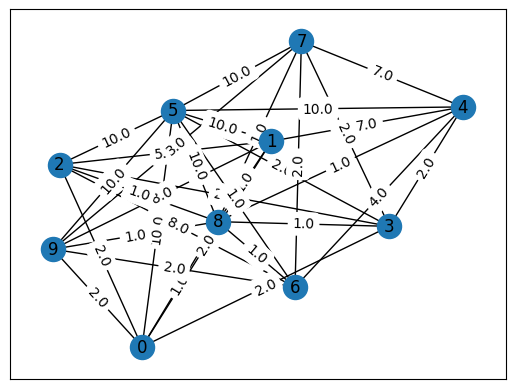

In [35]:
show_data(res_graph_bad)

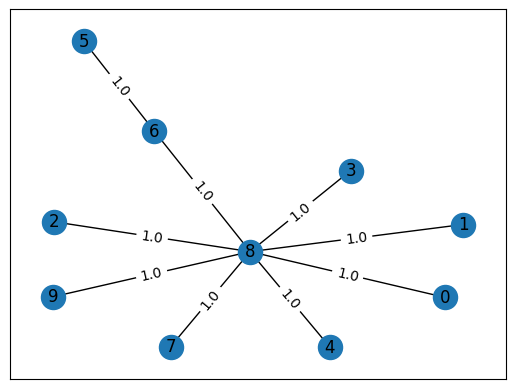

In [36]:
graph_provider = GraphProvider(res_graph_bad)
test_env = EnvMinimalTreeTwoStep(graph_provider)
show_data(test_env.min_tree)
# test_env.min_tree

In [37]:
torch.cat([util.get_node_sums(res_graph_bad).T, util.get_out_edges(res_graph_bad).T], dim=1).T

tensor([[3.0000, 6.0000, 8.0000, 0.0000, 7.0000, 9.0000, 2.0000, 4.0000, 1.0000,
         5.0000],
        [1.1000, 1.8000, 1.8000, 1.9000, 2.5000, 2.6000, 2.8000, 3.1000, 3.3000,
         7.3000],
        [0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 6.0000, 7.0000, 9.0000, 5.0000,
         8.0000],
        [6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 6.0000, 9.0000,
         9.0000]])

In [ ]:
for i in range(33):
    print(f'edges[0, {i}] = ')
    print(f'edges[1, {i}] = ')
    print(f'edges_weight[{i}] = ')
    # print('')